<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Prac2Ej1FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funcionamiento de las LIBRERIAS mlxtend o apyori

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mlxtend.frequent_patterns import apriori, association_rules

#pip install mlxtend  

In [ ]:
data = pd.read_csv('BlackFriday.csv', encoding='UTF-8')
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

Vamos a ver las ocurrencias de datos en las columnas de nuestro dataframe. Obviaremos product ID y user ID ya que los dos son unicos o hay muchos registros distintos de cada valor.


In [ ]:
cols_interes= data.columns[2:]
for col in cols_interes:
    print(f'Valores de la columa {col}: {data[col].unique()}')

Valores de la columa Gender: ['M' 'F']
Valores de la columa Age: ['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']
Valores de la columa Occupation: [ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5]
Valores de la columa City_Category: ['B' 'C' 'A']
Valores de la columa Stay_In_Current_City_Years: ['2' '0' '4+' '1' '3']
Valores de la columa Marital_Status: [1 0]
Valores de la columa Product_Category_1: [ 1  3  5  4  2 10 15 18  8 13  6 11 12  7 16 14 17  9]
Valores de la columa Product_Category_2: [11.  5. 14.  9.  3.  4. 13.  2. nan  8. 15. 17. 12. 16.  6. 10. 18.  7.]
Valores de la columa Product_Category_3: [nan 12. 15.  9. 16. 14.  4.  3.  5.  8. 17. 13. 11. 10.  6. 18.]


Vemos que las columas de Gender y Maritial Status son binarias. Las demas de pueden pasar a categoricas usando la fucnion .get_dummies. Esto lo haremos mas alanete ya que primero hay que comprobar si hay valores repetidos o nulos.

In [ ]:
data.isnull().values.any() 

True

Vemos en que columnas hay NA's

In [ ]:
data.isna().sum()  

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Los valores de NaN aparecen en Product Category. Vamos a comprobar el rango de valores para estas dos categorias.

In [ ]:
print(data['Product_Category_1'].min(), data['Product_Category_1'].max(), data['Product_Category_1'].mean())

1 18 5.276542279718663


In [ ]:
print(data['Product_Category_2'].min(), data['Product_Category_2'].max(), data['Product_Category_2'].mean())


2.0 18.0 9.849586059346997


In [ ]:
print(data['Product_Category_3'].min(), data['Product_Category_3'].max(), data['Product_Category_3'].mean())

3.0 18.0 12.669453946534905


Observamos que las dos columnas tienen valores minimos de 2 y 3 respectivamente. Por tanto los valores NaN se pueden igualar a 0 para que asi se contemplen en el analisis de los datos pero no influyan al estudio. 

In [ ]:
data.fillna(0, inplace=True)

Vemos si hay algún dato duplicado

In [ ]:
if any(data.duplicated()):
  print("Hay datos duplicados")
else:
  print("No hay datos duplicados")

No hay datos duplicados


- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [ ]:
# Variables categoricas a dummy 
dummy_df = pd.get_dummies(data,columns=['Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'])

# Concatenamos las variables dummy con el DataFrame original
data4 = pd.concat([data, dummy_df], axis=1)

# Drop las columnas originales. Ademas Drop de User_ID ya que es unico para cada cliente
data4.drop(['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'], axis=1, inplace=True)

data4



,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,Product_ID_P00000542,Product_ID_P00000642,Product_ID_P00000742,Product_ID_P00000842,Product_ID_P00000942,Product_ID_P00001042,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
233597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Creamos vectores con todos los nombres de las columnas dummy de cada una de las variables categoricas

dummy_df_OC = pd.get_dummies(data,columns=['Occupation'])
dummy_df_OC_new = list(dummy_df_OC.filter(like='Occupation_').columns)

dummy_df_C = pd.get_dummies(data,columns=['City_Category'])
dummy_df_C_new = list(dummy_df_C.filter(like='City_Category_').columns)

dummy_df_S = pd.get_dummies(data,columns=['Stay_In_Current_City_Years'])
dummy_df_S_new = list(dummy_df_S.filter(like='Stay_In_Current_City_Years_').columns)

dummy_df_A = pd.get_dummies(data,columns=['Age'])
dummy_df_A_new = list(dummy_df_OC.filter(like='Age_').columns)

dummy_df_MS = pd.get_dummies(data,columns=['Marital_Status'])
dummy_df_MS_new = list(dummy_df_MS.filter(like='Marital_Status_').columns)

dummy_df_PC1 = pd.get_dummies(data,columns=['Product_Category_1'])
dummy_df_PC1_new = list(dummy_df_PC1.filter(like='Product_Category_1_').columns)

dummy_df_PC2 = pd.get_dummies(data,columns=['Product_Category_2'])
dummy_df_PC2_new = list(dummy_df_PC2.filter(like='Product_Category_2_').columns)

dummy_df_PC3 = pd.get_dummies(data,columns=['Product_Category_3'])
dummy_df_PC3_new = list(dummy_df_PC3.filter(like='Product_Category_3_').columns)

In [ ]:
#Creamos un dataframe nuevo para cada categorica agrupando por User_ID y Occupation y sumamos las columnas P_C1,P_C2,P_C3 para cada grupo
data_P = data.groupby(['User_ID','Product_ID'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

data_G = data.groupby(['User_ID','Gender'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

data_A = data.groupby(['User_ID','Age'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

data_OC = data.groupby(['User_ID','Occupation'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_OC = data_OC.set_axis(dummy_df_OC_new, axis = 1, inplace = False)

data_C = data.groupby(['User_ID','City_Category'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_C = data_C.set_axis(dummy_df_C_new, axis = 1, inplace = False)

data_S = data.groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_S = data_S.set_axis(dummy_df_S_new, axis = 1, inplace = False)

data_MS = data.groupby(['User_ID','Marital_Status'])['Product_Category_2'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_MS = data_MS.set_axis(dummy_df_MS_new, axis = 1, inplace = False)

data_PC1 = data.groupby(['User_ID','Product_Category_1'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_PC1 = data_PC1.set_axis(dummy_df_PC1_new, axis = 1, inplace = False)

data_PC2 = data.groupby(['User_ID','Product_Category_2'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_PC2 = data_PC2.set_axis(dummy_df_PC2_new, axis = 1, inplace = False)

data_PC3= data.groupby(['User_ID','Product_Category_3'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
data_PC3 = data_PC3.set_axis(dummy_df_PC3_new, axis = 1, inplace = False)


In [ ]:
#Agrupamos todo en un mismo Dataframe
data4 = pd.concat([data_P, data_G,data_A,data_OC,data_C,data_S,data_MS,data_PC1,data_PC2,data_PC3], axis = 1)

In [ ]:
print(data4.columns)

Index(['P00000142', 'P00000242', 'P00000342', 'P00000442', 'P00000542',
       'P00000642', 'P00000742', 'P00000842', 'P00000942', 'P00001042',
       ...
       'Product_Category_3_9.0', 'Product_Category_3_10.0',
       'Product_Category_3_11.0', 'Product_Category_3_12.0',
       'Product_Category_3_13.0', 'Product_Category_3_14.0',
       'Product_Category_3_15.0', 'Product_Category_3_16.0',
       'Product_Category_3_17.0', 'Product_Category_3_18.0'],
      dtype='object', length=3583)


Colocamos los datos de la forma indicada para poder calcular las frecuencias de estos más adelante

# 1) Itemsets frecuentes para k=1

Para hallar esto necesitamos calcular el soporte y las frecuencias de estos itemsets

IR VARIANDO EL MIN_SUPPORT HASTA QUE SALE UN NÚMERO DE REGLAS RAZONABLE

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data4, min_support=0.5, use_colnames=True)
frequent_itemsets_k1 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
frequent_itemsets_k1_sort = frequent_itemsets_k1.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k1_sort.support*len(data4)
frequent_itemsets_k1_sort['frecuencia'] =frequent
frequent_itemsets_k1_sort

,support,itemsets,frecuencia
17,0.997963,(Product_Category_3_0.0),5879.0
8,0.944152,(Product_Category_2_0.0),5562.0
5,0.913597,(Product_Category_1_5),5382.0
3,0.910711,(Product_Category_1_1),5365.0
7,0.873196,(Product_Category_1_8),5144.0
13,0.830929,(Product_Category_2_8.0),4895.0
14,0.757936,(Product_Category_2_14.0),4465.0
9,0.729588,(Product_Category_2_2.0),4298.0
16,0.723986,(Product_Category_2_16.0),4265.0
0,0.717196,(M),4225.0


COMPRUEBAMOS QUE LOS VALORES SON LOS CORRESTOS

SupportMale=len(Gender)/Male



In [ ]:
SupportMale=sum(data4.M==True)/len(data4.M+data4.F)
print(SupportMale)

0.7171957222882362


Vamos que es correcto

# 2) Itemsets frecuentes para k≥2.

## a. Mostrar los itemset frecuentes candidatos y su soporte.

In [ ]:
frequent_itemsets_k2 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
frequent_itemsets_k2_sort = frequent_itemsets_k2.sort_values(by=['support'], ascending=False)
frequent=frequent_itemsets_k2_sort.support*len(data4)
frequent_itemsets_k2_sort['frecuenciak2'] =frequent
frequent_itemsets_k2_sort

,support,itemsets,frecuenciak2
102,0.944152,"(Product_Category_2_0.0, Product_Category_3_0.0)",5562.0
73,0.913258,"(Product_Category_1_5, Product_Category_3_0.0)",5380.0
53,0.909014,"(Product_Category_3_0.0, Product_Category_1_1)",5355.0
65,0.881854,"(Product_Category_1_5, Product_Category_2_0.0)",5195.0
90,0.873196,"(Product_Category_3_0.0, Product_Category_1_8)",5144.0
...,...,...,...
97,0.501782,"(Product_Category_2_0.0, Product_Category_2_6.0)",2956.0
126,0.501103,"(Product_Category_3_15.0, Product_Category_2_8.0)",2952.0
60,0.500764,"(Product_Category_1_2, Product_Category_1_8)",2950.0
108,0.500594,"(Product_Category_2_5.0, Product_Category_2_2.0)",2949.0


# 3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

In [ ]:
frequent_itemsets_k3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]
frequent_itemsets_k3_sort = frequent_itemsets_k3.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k3_sort.support*len(data4)
frequent_itemsets_k3_sort['frecuenciak3'] =frequent

frequent_itemsets_k3_sort

,support,itemsets,frecuenciak3
269,0.881854,"(Product_Category_1_5, Product_Category_2_0.0,...",5195.0
210,0.861653,"(Product_Category_2_0.0, Product_Category_3_0....",5076.0
312,0.843999,"(Product_Category_2_0.0, Product_Category_3_0....",4972.0
187,0.835512,"(Product_Category_1_5, Product_Category_3_0.0,...",4922.0
261,0.814802,"(Product_Category_1_5, Product_Category_3_0.0,...",4800.0
...,...,...,...
216,0.500594,"(Product_Category_2_5.0, Product_Category_1_1,...",2949.0
188,0.500594,"(Product_Category_1_5, Product_Category_3_14.0...",2949.0
382,0.500255,"(Product_Category_2_5.0, Product_Category_3_0....",2947.0
370,0.500255,"(Product_Category_2_5.0, Product_Category_3_0....",2947.0


In [ ]:
frequent_itemsets_k4 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 4)]
frequent_itemsets_k4_sort = frequent_itemsets_k4.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k4_sort.support*len(data4)
frequent_itemsets_k4_sort['frecuenciak4'] =frequent

frequent_itemsets_k4_sort.head()

,support,itemsets,frecuenciak4
448,0.808182,"(Product_Category_1_5, Product_Category_2_0.0,...",4761.0
570,0.795451,"(Product_Category_1_5, Product_Category_2_0.0,...",4686.0
484,0.777287,"(Product_Category_2_0.0, Product_Category_3_0....",4579.0
600,0.763028,"(Product_Category_1_5, Product_Category_2_0.0,...",4495.0
440,0.753183,"(Product_Category_1_5, Product_Category_3_0.0,...",4437.0


In [ ]:
frequent_itemsets_k5 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 5)]
frequent_itemsets_k5_sort = frequent_itemsets_k5.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k5_sort.support*len(data4)
frequent_itemsets_k5_sort['frecuenciak5'] =frequent

frequent_itemsets_k5_sort.head()

,support,itemsets,frecuenciak5
725,0.736208,"(Product_Category_1_1, Product_Category_1_5, P...",4337.0
754,0.714310,"(Product_Category_1_1, Product_Category_1_5, P...",4208.0
855,0.704464,"(Product_Category_1_5, Product_Category_3_0.0,...",4150.0
794,0.691563,"(Product_Category_1_1, Product_Category_3_0.0,...",4074.0
736,0.675267,"(Product_Category_1_1, Product_Category_1_5, P...",3978.0


In [ ]:
frequent_itemsets_k6 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 6)]
frequent_itemsets_k6_sort = frequent_itemsets_k6.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k6_sort.support*len(data4)
frequent_itemsets_k6_sort['frecuenciak6'] =frequent

frequent_itemsets_k6_sort.head()

,support,itemsets,frecuenciak6
930,0.664913,"(Product_Category_1_1, Product_Category_1_5, P...",3917.0
933,0.625700,"(Product_Category_1_1, Product_Category_1_5, P...",3686.0
955,0.610423,"(Product_Category_1_1, Product_Category_1_5, P...",3596.0
990,0.608555,"(Product_Category_1_5, Product_Category_3_0.0,...",3585.0
926,0.604481,"(Product_Category_1_1, Product_Category_2_2.0,...",3561.0


In [ ]:
frequent_itemsets_k7 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 7)]
frequent_itemsets_k7_sort = frequent_itemsets_k7.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k7_sort.support*len(data4)
frequent_itemsets_k7_sort['frecuenciak7'] =frequent

frequent_itemsets_k7_sort.head()

,support,itemsets,frecuenciak7
1006,0.582074,"(Product_Category_1_1, Product_Category_1_5, P...",3429.0
1003,0.554575,"(Product_Category_1_1, Product_Category_2_2.0,...",3267.0
1008,0.550671,"(Product_Category_1_1, Product_Category_1_5, P...",3244.0
1004,0.527415,"(Product_Category_1_1, Product_Category_2_2.0,...",3107.0
1009,0.524699,"(Product_Category_1_1, Product_Category_1_5, P...",3091.0


Con k=8 no salen más itemsets

In [ ]:
frequent_itemsets_k8 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 8)]
frequent_itemsets_k8_sort = frequent_itemsets_k8.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k8_sort.support*len(data4)
frequent_itemsets_k8_sort['frecuenciak7'] =frequent

frequent_itemsets_k8_sort.head()

,support,itemsets,frecuenciak7


# 4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence',  min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(Product_Category_1_1),0.717196,0.910711,0.667119,0.930178,1.021375,0.013961,1.278796
1,(Product_Category_1_1),(M),0.910711,0.717196,0.667119,0.732526,1.021375,0.013961,1.057314
2,(M),(Product_Category_1_5),0.717196,0.913597,0.652521,0.909822,0.995868,-0.002707,0.958143
3,(Product_Category_1_5),(M),0.913597,0.717196,0.652521,0.714233,0.995868,-0.002707,0.989631
4,(M),(Product_Category_1_8),0.717196,0.873196,0.623833,0.869822,0.996136,-0.002420,0.974082
...,...,...,...,...,...,...,...,...,...
19479,(Product_Category_3_0.0),"(Product_Category_1_5, Product_Category_2_16.0...",0.997963,0.504159,0.504159,0.505188,1.002041,0.001027,1.002080
19480,(Product_Category_2_14.0),"(Product_Category_1_5, Product_Category_2_16.0...",0.757936,0.566627,0.504159,0.665174,1.173918,0.074692,1.294321
19481,(Product_Category_2_0.0),"(Product_Category_1_5, Product_Category_2_16.0...",0.944152,0.508912,0.504159,0.533981,1.049259,0.023669,1.053793
19482,(Product_Category_2_8.0),"(Product_Category_1_5, Product_Category_2_16.0...",0.830929,0.535563,0.504159,0.606742,1.132905,0.059145,1.180998


# 5) Listar todas las reglas que sean de alta confianza.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence',  min_threshold=0.90)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(Product_Category_1_1),0.717196,0.910711,0.667119,0.930178,1.021375,0.013961,1.278796
1,(M),(Product_Category_1_5),0.717196,0.913597,0.652521,0.909822,0.995868,-0.002707,0.958143
2,(M),(Product_Category_2_0.0),0.717196,0.944152,0.679341,0.947219,1.003248,0.002200,1.058105
3,(M),(Product_Category_3_0.0),0.717196,0.997963,0.715498,0.997633,0.999669,-0.000237,0.860635
4,(City_Category_C),(Product_Category_3_0.0),0.532847,0.997963,0.531149,0.996814,0.998849,-0.000612,0.639416
...,...,...,...,...,...,...,...,...,...
5157,"(Product_Category_2_16.0, Product_Category_2_0...","(Product_Category_1_5, Product_Category_3_0.0,...",0.529791,0.814802,0.504159,0.951618,1.167913,0.072484,3.827829
5158,"(Product_Category_2_16.0, Product_Category_2_0...","(Product_Category_1_5, Product_Category_2_8.0,...",0.549143,0.782550,0.504159,0.918083,1.173195,0.074427,2.654535
5159,"(Product_Category_2_16.0, Product_Category_2_8...","(Product_Category_1_5, Product_Category_2_0.0,...",0.518757,0.881854,0.504159,0.971859,1.102063,0.046691,4.198316
5160,"(Product_Category_2_16.0, Product_Category_2_8...","(Product_Category_1_5, Product_Category_2_0.0,...",0.538109,0.795451,0.504159,0.936909,1.177834,0.076120,3.242107


1- SEGÚN SU CONFIANZA

In [ ]:
rules_sort = rules.sort_values(by=['confidence'], ascending=False)
rules_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4553,"(Product_Category_2_2.0, Product_Category_1_5,...",(Product_Category_3_0.0),0.527415,0.997963,0.527415,1.000000,1.002041,0.001074,inf
1860,"(Product_Category_2_16.0, Product_Category_2_8...",(Product_Category_3_0.0),0.511119,0.997963,0.511119,1.000000,1.002041,0.001041,inf
1932,"(M, Product_Category_2_0.0, Product_Category_2...",(Product_Category_3_0.0),0.502292,0.997963,0.502292,1.000000,1.002041,0.001023,inf
514,"(Product_Category_3_15.0, Product_Category_1_8)",(Product_Category_3_0.0),0.512646,0.997963,0.512646,1.000000,1.002041,0.001044,inf
1925,"(M, Product_Category_2_0.0, Product_Category_2...",(Product_Category_3_0.0),0.547106,0.997963,0.547106,1.000000,1.002041,0.001114,inf
...,...,...,...,...,...,...,...,...,...
1334,"(Product_Category_2_5.0, Product_Category_1_5)","(Product_Category_2_0.0, Product_Category_1_8)",0.564081,0.843999,0.507724,0.900090,1.066459,0.031640,1.561416
3042,"(Product_Category_2_5.0, Product_Category_3_0....","(Product_Category_2_0.0, Product_Category_1_8)",0.564081,0.843999,0.507724,0.900090,1.066459,0.031640,1.561416
3047,"(Product_Category_2_5.0, Product_Category_1_5)","(Product_Category_2_0.0, Product_Category_3_0....",0.564081,0.843999,0.507724,0.900090,1.066459,0.031640,1.561416
599,(Product_Category_2_5.0),"(Product_Category_2_8.0, Product_Category_3_0.0)",0.592938,0.830080,0.533695,0.900086,1.084337,0.041509,1.700663


# 6) Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor. 


In [ ]:
antereg=rules_sort[rules_sort['antecedents'].apply(lambda x: 'M' in x)]
antereg

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1932,"(M, Product_Category_2_0.0, Product_Category_2...",(Product_Category_3_0.0),0.502292,0.997963,0.502292,1.000000,1.002041,0.001023,inf
1925,"(M, Product_Category_2_0.0, Product_Category_2...",(Product_Category_3_0.0),0.547106,0.997963,0.547106,1.000000,1.002041,0.001114,inf
1922,"(M, Product_Category_2_0.0, Product_Category_2...","(Product_Category_3_0.0, Product_Category_1_1)",0.524529,0.909014,0.524529,1.000000,1.100093,0.047725,inf
1919,"(M, Product_Category_2_0.0, Product_Category_3...",(Product_Category_1_1),0.524529,0.910711,0.524529,1.000000,1.098043,0.046835,inf
1918,"(M, Product_Category_2_0.0, Product_Category_1...",(Product_Category_3_0.0),0.524529,0.997963,0.524529,1.000000,1.002041,0.001068,inf
...,...,...,...,...,...,...,...,...,...
640,"(M, Product_Category_2_8.0, Product_Category_1_1)",(Product_Category_1_8),0.567815,0.873196,0.513325,0.904036,1.035318,0.017511,1.321365
1915,"(M, Product_Category_2_8.0, Product_Category_1_1)","(Product_Category_3_0.0, Product_Category_1_8)",0.567815,0.873196,0.513325,0.904036,1.035318,0.017511,1.321365
671,"(M, Product_Category_2_0.0, Product_Category_1_5)",(Product_Category_1_8),0.632490,0.873196,0.569852,0.900966,1.031802,0.017564,1.280407
1942,"(M, Product_Category_2_0.0, Product_Category_3...",(Product_Category_1_8),0.632490,0.873196,0.569852,0.900966,1.031802,0.017564,1.280407


## 6.2) Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(Product_Category_1_1),0.717196,0.910711,0.667119,0.930178,1.021375,0.013961,1.278796
1,(Product_Category_1_1),(M),0.910711,0.717196,0.667119,0.732526,1.021375,0.013961,1.057314
2,(M),(Product_Category_1_5),0.717196,0.913597,0.652521,0.909822,0.995868,-0.002707,0.958143
3,(Product_Category_1_5),(M),0.913597,0.717196,0.652521,0.714233,0.995868,-0.002707,0.989631
4,(M),(Product_Category_1_8),0.717196,0.873196,0.623833,0.869822,0.996136,-0.002420,0.974082
...,...,...,...,...,...,...,...,...,...
17527,"(Product_Category_2_0.0, Product_Category_2_8.0)","(Product_Category_1_5, Product_Category_2_16.0...",0.799864,0.542522,0.504159,0.630306,1.161805,0.070215,1.237448
17528,"(Product_Category_2_8.0, Product_Category_1_8)","(Product_Category_1_5, Product_Category_2_16.0...",0.748939,0.555254,0.504159,0.673164,1.212354,0.088308,1.360763
17529,(Product_Category_2_16.0),"(Product_Category_1_5, Product_Category_3_0.0,...",0.723986,0.608555,0.504159,0.696366,1.144293,0.063573,1.289198
17530,(Product_Category_2_14.0),"(Product_Category_1_5, Product_Category_2_16.0...",0.757936,0.566627,0.504159,0.665174,1.173918,0.074692,1.294321


# 7) Representar gráficamente las reglas obtenidas


Es interesante analizar las siguientes graficas:

Soporte vs. Cantidad de elementos: Con esta grafica podemos representar el soporte de cada conjunto de elementos de diferentes tamaños. Puede ayudar a identificar los conjuntos de elementos más frecuentes y sus tamaños.

Confianza vs. soporte: Este gráfico muestra la confianza de las reglas de asociación frente a su soporte. Puede ayudar a identificar las reglas que son de alta calidad y tienen un alto soporte.

Lift vs. soporte: Este puede ayudar a identificar las reglas que tienen mayor impacto significativo en la venta de los elementos.


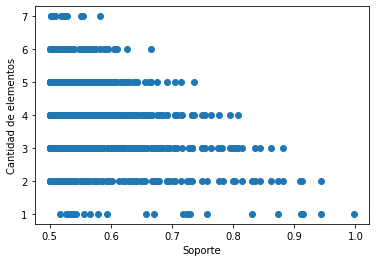

In [ ]:
plt.scatter(frequent_itemsets.support, frequent_itemsets.itemsets.apply(lambda x: len(x)))
plt.xlabel('Soporte')
plt.ylabel('Cantidad de elementos')
plt.show()


Con esta grafica de Soporte vs Cantidad de elementos vemos la cantidad de reglas para cada uno de los k de los itemsets y sus respectivos valores de soporte. Se ve que el mejor soporte lo da los k=1.

A medida que aumentan los itemesets (k's) el soorte va disminuyendo 

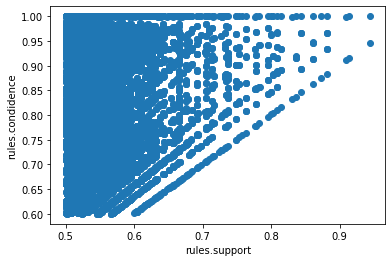

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.scatter(rules.support, rules.confidence)  

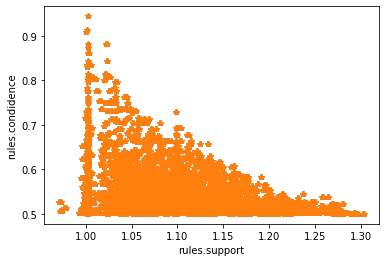

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules['lift'],rules['support'], '*')  
plt.plot(rules.lift,rules.support,'*')

La mayor parte de las reglas estan entre un 0.5 y un 0.65 de confianza

## 7.1) Obtener conclusiones a partir de estas

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [ ]:
# lista de variables dummy 
dummy_vars = list(data4.columns)
#Filtramos para genero, edad y tipo de producto
age_vars = [var for var in dummy_vars if var.startswith('Age')]
age_data = data4[age_vars]
gender_vars = [var for var in dummy_vars if var.startswith('Gender')]
gender_data = data4[gender_vars]
pc1_vars = [var for var in dummy_vars if var.startswith('Product_Category_1')]
pc1_data = data4[pc1_vars]
pc2_vars = [var for var in dummy_vars if var.startswith('Product_Category_2')]
pc2_data = data4[pc2_vars]
pc3_vars = [var for var in dummy_vars if var.startswith('Product_Category_3')]
pc3_data = data4[pc3_vars]

In [ ]:
dataq1 = pd.concat([age_data, gender_data, pc1_data, pc2_data, pc3_data], axis = 1)
frq_items_q1 = apriori(dataq1, min_support = 0.3, use_colnames = True)


In [ ]:
frq_items_q1_25 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.25 <= x)]
frq_items_q1_50 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.50 <= x)]
frq_items_q1_75 = frq_items_q1[frq_items_q1["support"].apply(lambda x: 0.75 <= x)]

In [ ]:
frq_items_q1_25

,support,itemsets
0,0.910711,(Product_Category_1_1)
1,0.543711,(Product_Category_1_2)
2,0.488712,(Product_Category_1_3)
3,0.383806,(Product_Category_1_4)
4,0.913597,(Product_Category_1_5)
...,...,...
52242,0.305211,"(Product_Category_1_1, Product_Category_2_2.0,..."
52243,0.314548,"(Product_Category_1_1, Product_Category_2_2.0,..."
52244,0.310474,"(Product_Category_1_1, Product_Category_2_2.0,..."
52245,0.306909,"(Product_Category_2_2.0, Product_Category_1_5,..."


In [ ]:
frq_items_q1_50

In [ ]:
frq_items_q1_75

In [91]:
print(frq_items_q1_75[frq_items_q1_75['itemsets'].apply(lambda x: 'Product_Category_1_5' in x)])

       support                                           itemsets
4     0.913597                             (Product_Category_1_5)
33    0.835682       (Product_Category_1_5, Product_Category_1_1)
113   0.814802       (Product_Category_1_5, Product_Category_1_8)
116   0.881854     (Product_Category_1_5, Product_Category_2_0.0)
121   0.782889     (Product_Category_1_5, Product_Category_2_8.0)
128   0.913258     (Product_Category_1_5, Product_Category_3_0.0)
414   0.753183  (Product_Category_1_5, Product_Category_1_1, P...
417   0.808182  (Product_Category_1_5, Product_Category_2_0.0,...
429   0.835512  (Product_Category_1_5, Product_Category_3_0.0,...
983   0.795451  (Product_Category_1_5, Product_Category_2_0.0,...
995   0.814802  (Product_Category_1_5, Product_Category_3_0.0,...
1021  0.763028  (Product_Category_1_5, Product_Category_2_0.0,...
1028  0.881854  (Product_Category_1_5, Product_Category_2_0.0,...
1101  0.782550  (Product_Category_1_5, Product_Category_2_8.0,...
2465  0.75

¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)
consideradas? ¿Por qué?

In [ ]:
rules_25 = association_rules(frq_items_q1_25, metric = 'confidence', min_threshold=0.51)
rules_25

In [ ]:
rules_50 = association_rules(frq_items_q1_50, metric = 'confidence', min_threshold=0.51)
rules_50

In [ ]:
rules_75 = association_rules(frq_items_q1_75, metric = 'confidence', min_threshold=0.51)
rules_75

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes
obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y
min_threshold. Justifica los resultados

In [ ]:
rules_25_lift = association_rules(frq_items_q1_25, metric = 'lift', min_threshold=0.51)
rules_25_lift

In [ ]:
rules_25_conviction = association_rules(frq_items_q1_25, metric = 'conviction', min_threshold=0.51)
rules_25_conviction

In [ ]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

2- SEGÚN SU LIFT

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

In [ ]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas
  que   
  te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   
un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold.  
Justifica los resultados. (1 punto)

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.4)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

In [ ]:
any(rules.duplicated())

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)

In [ ]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules.support, rules.confidence, '*')  

#Se Pide:

A partir de lo anterior se pide:

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
(1 punto)

- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

-   ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué? (1 punto)

2 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CONFIGURACIÓN:

1- SEGÚN SU CONFIANZA

CONFIZANZA= SOPORTE(1) / SOPORTE(1,2)

2- SEGÚN SU LIFT

LIFT = CONFIANZA / SOPORTE

3 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CATEGORÍA:

1- GÉNERO 2- EDAD 3- TIPO DE PRODUCTO

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados. (1 punto)

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)